#  Assignment (4) : Simple Linear Regression

### Example (1) : Predicting Delivery Time using Sorting Time

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.shape

(21, 2)

In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x25099a0f310>,
 'caps': [<matplotlib.lines.Line2D at 0x2509897e9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2509925dd00>],
 'medians': [<matplotlib.lines.Line2D at 0x2509895b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2509895b5e0>],
 'means': []}

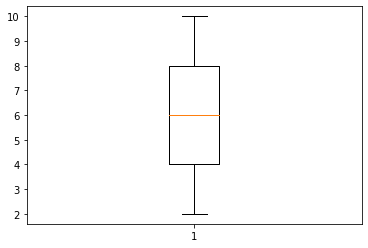

In [5]:
# Boxplot & Histogram for independent variable - Sorting Time
plt.boxplot(data['Sorting Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

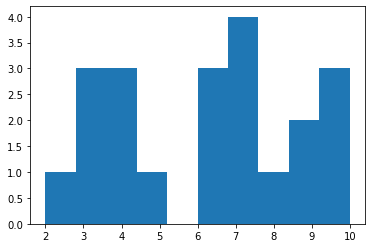

In [6]:
plt.hist(data["Sorting Time"])

{'whiskers': [<matplotlib.lines.Line2D at 0x25099a311f0>,
 'caps': [<matplotlib.lines.Line2D at 0x25099a576d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25099a31280>],
 'medians': [<matplotlib.lines.Line2D at 0x25099a57dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25099a57550>],
 'means': []}

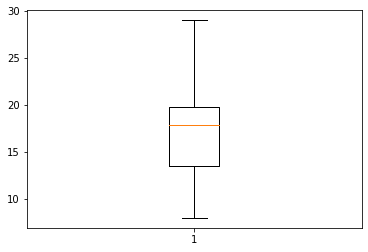

In [7]:
# Boxplot & Histogram for dependent variable - Delivery Time
plt.boxplot(data['Delivery Time'])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

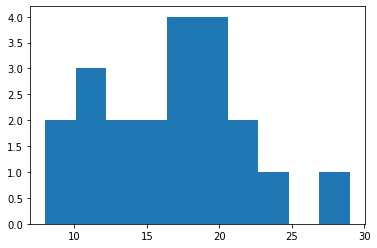

In [8]:
plt.hist(data['Delivery Time'])

In [9]:
# Finding Correlation
data['Delivery Time'].corr(data['Sorting Time'])

0.8259972607955326

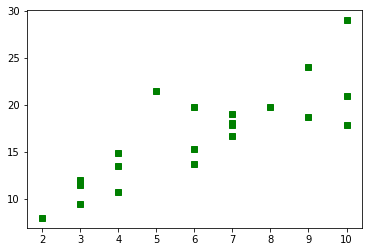

In [17]:
#Scatter Plot
plt.plot(data['Sorting Time'], data['Delivery Time'], 'gs')

In [20]:
#Renaming the columns
data.rename(columns= {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace= True)
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [21]:
# Model Building

import statsmodels.formula.api as smf
model_1 = smf.ols('DT~ST', data=data).fit()

In [22]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        11:27:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Predicting DT values for model_1 with R^2 value of 0.682 & coefficients as c = 6.5827 & m = 1.649
pred = model_1.predict(data.iloc[:, 1])
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [24]:
#Calculating RMSE value
rmse_model_1 = np.sqrt(np.mean((np.array(data['DT'])-np.array(pred))**2))
rmse_model_1

2.7916503270617654

Text(0, 0.5, 'Delivery Time')

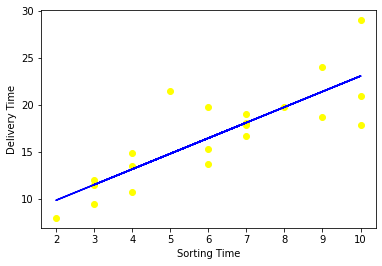

In [25]:
plt.scatter(x= data['ST'], y=data['DT'], color='yellow')
plt.plot(data['ST'], pred,color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [26]:
# Building Logarithmic model

model_2 = smf.ols('DT~np.log(ST)', data= data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        11:37:04   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Predicting DT values for model_2 with R^2 value of 0.695 & coefficients as c = 1.597 & m = 9.0434
pred2 = model_2.predict(data.iloc[:,1])
pred2.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [29]:
#Calculating RMSE value
rmse_model_2 = np.sqrt(np.mean((np.array(data['DT'])-np.array(pred2))**2))
rmse_model_2

2.733171476682066

Text(0, 0.5, 'Delivery Time')

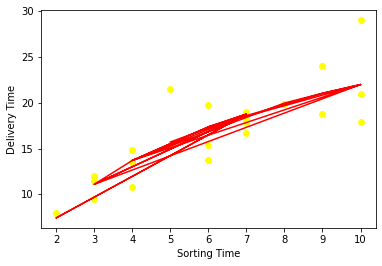

In [30]:
plt.scatter(x= data['ST'], y=data['DT'], color='yellow')
plt.plot(data['ST'], pred2,color='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [33]:
# Building Logarithmic + Square model

data["ST_Square"] = data.ST*data.ST
data 

model_3 = smf.ols("np.log(DT)~ST+ST_Square",data= data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           2.20e-06
Time:                        11:45:56   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_Square     -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Predicting DT values for model_3 with R^2 value of 0.765 & coefficients as c = 1.6997 & m = 0.2659
pred3_log = model_3.predict(data)
pred3 = np.exp(pred3_log)               #Since we have taken log of DT
pred3.head()

0    21.646921
1    12.909227
2    16.995933
3    21.176938
4    21.646921
dtype: float64

In [45]:
#Calculating RMSE value
rmse_model_3 = np.sqrt(np.mean((np.array(data['DT'])-np.array(pred3))**2))
rmse_model_3


2.799041988740925

Text(0, 0.5, 'Delivery Time')

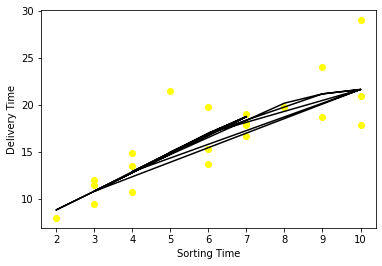

In [41]:
plt.scatter(x= data['ST'], y=data['DT'], color='yellow')
plt.plot(data['ST'], pred3,color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [46]:
net = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_model_1, rmse_model_2, rmse_model_3]),
        "Rsquare":pd.Series([model_1.rsquared,model_2.rsquared,model_3.rsquared])}
Comparison_table= pd.DataFrame(net)
Comparison_table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_quad,2.799042,0.764867


In [47]:
#Selecting model_3 as it has the highest r-squared value of 0.764 & RMSE value of 2.79

###  Example (2) : Prediction of Salary Hike

In [48]:
hike = pd.read_csv("Salary_Data.csv")
hike.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [49]:
hike.shape

(30, 2)

In [50]:
hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [55]:
#Renaming the columns
hike.rename(columns={'YearsExperience':'exp','Salary':'sal'}, inplace= True)
hike.head()

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2509e88e760>,
 'caps': [<matplotlib.lines.Line2D at 0x2509ebac520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2509cd099a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2509d4d6df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2509d364d00>],
 'means': []}

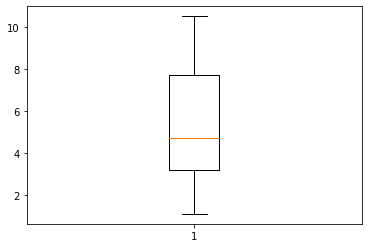

In [56]:
# Boxplot & Histogram for independent variable - Years of Experience
plt.boxplot(hike.exp)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

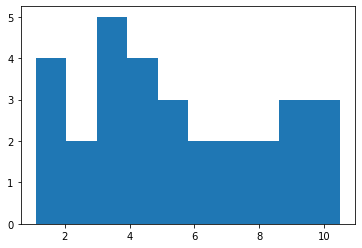

In [57]:
plt.hist(hike.exp)

{'whiskers': [<matplotlib.lines.Line2D at 0x2509b78ee50>,
 'caps': [<matplotlib.lines.Line2D at 0x2509c9a0cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2509b78e490>],
 'medians': [<matplotlib.lines.Line2D at 0x2509b755dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2509b755280>],
 'means': []}

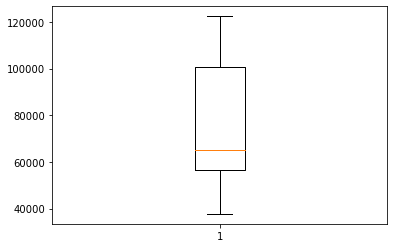

In [58]:
# Boxplot & Histogram for dependent variable - Salary
plt.boxplot(hike.sal)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

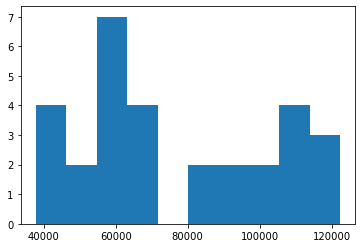

In [59]:
plt.hist(hike.sal)

In [60]:
#Finding correlation
(hike.sal).corr(hike.exp)

0.9782416184887598

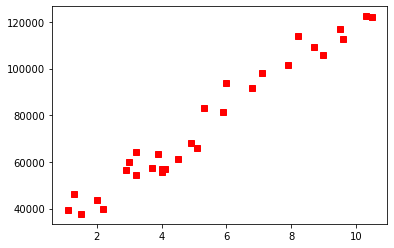

In [61]:
plt.plot(hike.exp, hike.sal, 'rs')

In [62]:
# Model Building
# Building simple linear model

import statsmodels.formula.api as smf
model1 = smf.ols('sal~exp', data=hike).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        12:39:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Predicting Salary values for model1 with R^2 value of 0.957 & coefficients as c = 2.57e+04 & m = 9449.96
pred_1 = model1.predict(hike.iloc[:,0])
pred_1.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [71]:
#calculating RMSE value
rmse_model1 = np.sqrt(np.mean((np.array(hike['sal'])-np.array(pred_1))**2))
rmse_model1

5592.043608760662

Text(0, 0.5, 'Salary Hike')

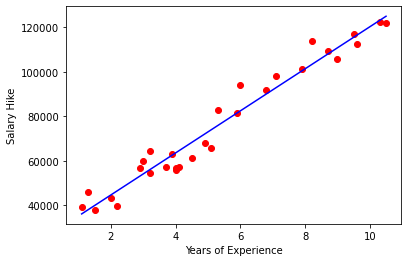

In [72]:
plt.scatter(x= hike['exp'], y=hike['sal'], color='red')
plt.plot(hike['exp'], pred_1, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')

In [73]:
# Building Logarithemic model

model2 = smf.ols('sal~np.log(exp)', data=hike).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        12:57:58   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Predicting Salary values for model2 with R^2 value of 0.854 & coefficients as c = 1.49e+04 & m = 4.058
pred_2 = model2.predict(hike.exp)
pred_2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [77]:
#Calculating RMSE value
rmse_model2 = np.sqrt(np.mean((np.array(hike['sal'])-np.array(pred_2))**2))
rmse_model2

10302.893706228308

Text(0, 0.5, 'Salary Hike')

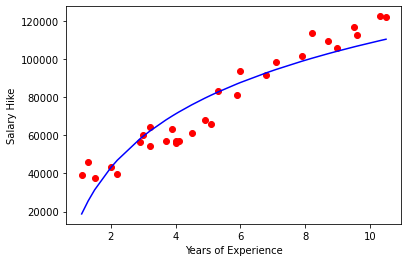

In [78]:
plt.scatter(x= hike['exp'], y=hike['sal'], color='red')
plt.plot(hike['exp'], pred_2, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')

In [79]:
# Building Exponential model

model3 = smf.ols('np.log(sal)~exp', data=hike).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           7.03e-18
Time:                        13:02:55   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
exp            0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Predicting Salary values for model3 with R^2 value of 0.932 & coefficients as c = 10.5074 & m = 0.1225
pred_3_log = model3.predict(hike)
pred_3 = np.exp(pred_3_log)               #Since we have taken log of sal
pred_3.head()

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

In [82]:
#Calculating RMSE value
rmse_model3 = np.sqrt(np.mean((np.array(hike['sal'])-np.array(pred_3))**2))
rmse_model3

7213.235076620129

Text(0, 0.5, 'Salary Hike')

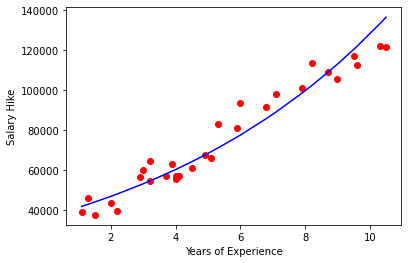

In [83]:
plt.scatter(x= hike['exp'], y=hike['sal'], color='red')
plt.plot(hike['exp'], pred_3, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')

In [84]:
#Building Logarithmic + Square model

hike["exp_sq"] = hike.exp*hike.exp
hike 

model4 = smf.ols("np.log(sal)~exp+exp_sq",data= hike).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(sal)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           3.95e-18
Time:                        13:26:03   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
exp            0.2024      0.027      7.601      0.000       0.148       0.257
exp_sq        -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Predicting Salary values for model3 with R^2 value of 0.949 & coefficients as c = 10.33 & m = 0.2024
pred_4_log = model4.predict(hike)
pred_4 = np.exp(pred_4_log)               #Since we have taken log of sal
pred_4.head()

0    38233.559684
1    39686.674746
2    41173.227466
3    45033.440973
4    46633.832589
dtype: float64

In [88]:
#Calculating RMSE value
rmse_model4 = np.sqrt(np.mean((np.array(hike['sal'])-np.array(pred_4))**2))
rmse_model4

5391.081582693624

Text(0, 0.5, 'Salary Hike')

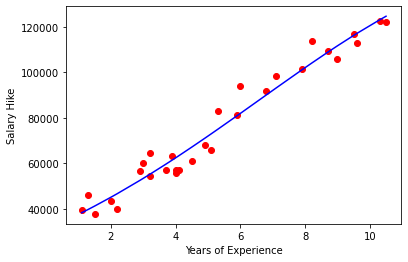

In [89]:
plt.scatter(x= hike['exp'], y=hike['sal'], color='red')
plt.plot(hike['exp'], pred_4, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')

In [90]:
output = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_model1, rmse_model2, rmse_model3, rmse_model4]),
        "Rsquare":pd.Series([model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared])}
final_table= pd.DataFrame(output)
final_table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


In [ ]:
#Selecting model4 as it has the best combination of r-squared value of 0.948 & RMSE value of 5391.08 